In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/Srikar/Documents/Semester 5/AI/Lab/Dataset/audit_risk.csv")

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
df.shape

(776, 27)

In [5]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(775, 27)

In [8]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [9]:
df.drop(['LOCATION_ID','TOTAL'],axis=1, inplace = True)
df.shape

(775, 25)

In [10]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [11]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)



In [12]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(pca_features)
pca_df.head()

,0,1
0,-0.603181,-0.631365
1,-1.567159,-0.008984
2,-1.580607,-0.022277
3,3.726895,-0.360836
4,-1.605943,0.005006


In [13]:
pca_df.shape

(775, 2)

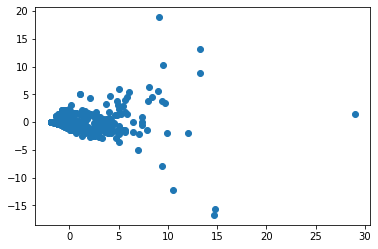

In [14]:
plt.scatter(pca_df[0],pca_df[1])

In [15]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors = 5)
model.fit(X)

NearestNeighbors()

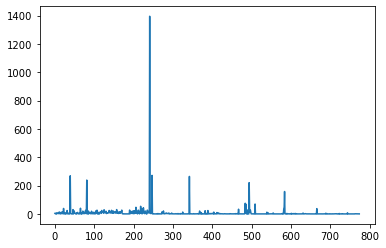

In [16]:
distances, indexes = model.kneighbors(X)

plt.plot(distances.mean(axis =1))

In [17]:
outlier_index = np.where(distances.mean(axis = 1) > 200)
outlier_index

(array([ 39,  81, 241, 247, 342, 494], dtype=int64),)

In [18]:
outlier_values = pca_df.iloc[outlier_index]
outlier_values

,0,1
39,10.523089,-12.256897
81,14.690921,-16.697316
241,28.983854,1.511416
247,9.434808,-7.963985
342,14.738142,-15.602760
494,12.067892,-1.884920


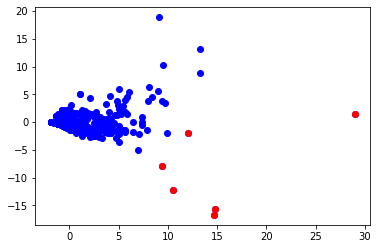

In [19]:
plt.scatter(pca_df[0], pca_df[1], color = "b")
plt.scatter(outlier_values[0], outlier_values[1], color = "r")

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df, Y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def to_print(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("Accuracy:", accuracy)
    print('Precision:', precision)
    print('Recall:', recall)

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[89  0]
 [ 4 62]]
Accuracy: 0.9741935483870968
Precision: 1.0
Recall: 0.9393939393939394


In [23]:
clf = AdaBoostClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[89  0]
 [ 3 63]]
Accuracy: 0.9806451612903225
Precision: 1.0
Recall: 0.9545454545454546


In [24]:
clf = AdaBoostClassifier(n_estimators = 150)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[87  2]
 [ 3 63]]
Accuracy: 0.967741935483871
Precision: 0.9692307692307692
Recall: 0.9545454545454546


In [25]:
clf = AdaBoostClassifier(learning_rate = 1.0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[89  0]
 [ 4 62]]
Accuracy: 0.9741935483870968
Precision: 1.0
Recall: 0.9393939393939394


In [26]:
clf = AdaBoostClassifier(learning_rate = 0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[89  0]
 [ 5 61]]
Accuracy: 0.967741935483871
Precision: 1.0
Recall: 0.9242424242424242


In [27]:
clf = AdaBoostClassifier(learning_rate = 0.001)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

Confusion Matrix: 
 [[89  0]
 [ 5 61]]
Accuracy: 0.967741935483871
Precision: 1.0
Recall: 0.9242424242424242
